In [35]:
import numpy as np
import pandas as pd
import os
from kaggle.api.kaggle_api_extended import KaggleApi
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler



In [36]:
# Step 1: Set the path to your kaggle.json
os.environ['KAGGLE_CONFIG_DIR'] = r"C:\Users\cnuna\.kaggle"  # adjust if needed

# Step 2: Authenticate Kaggle API
api = KaggleApi()
api.authenticate()

# Step 3: Download dataset (replace with the Kaggle dataset API path and do NOT include CSV filename)
dataset = "rjmanoj/credit-card-customer-churn-prediction"

# Step 4: Download and unzip all files to current folder
api.dataset_download_files(dataset, path=".", unzip=True)

# Step 5: Load CSV into Pandas
df = pd.read_csv("Churn_Modelling.csv", index_col=0)
df.head(5)

Dataset URL: https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [38]:
df.isnull().sum() / len(df) * 100

CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [39]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [40]:
df.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [41]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [42]:
# Features (everything except target)
X = df.drop(["CustomerId", "Surname", "Exited"], axis=1)
# Target
y = df["Exited"]

In [43]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [44]:
X.shape

(10000, 10)

In [45]:
num_columns = X.select_dtypes(include=['int', 'float']).columns
print(num_columns)

cat_columns = X.select_dtypes(exclude=['int', 'float']).columns
print(cat_columns)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')
Index(['Geography', 'Gender'], dtype='object')


In [46]:
X[cat_columns].value_counts()

Geography  Gender
France     Male      2753
           Female    2261
Spain      Male      1388
Germany    Male      1316
           Female    1193
Spain      Female    1089
Name: count, dtype: int64

In [47]:
pipe_1 = Pipeline(steps=[
    ("one_hot_encoder",OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")),
   ("scaler", StandardScaler()),
])

pipe_2 = Pipeline(steps=[
    ("standard_scaler", StandardScaler())
])


In [48]:
preprocessor = ColumnTransformer(transformers=[
    ("one_hot_encoder",pipe_1, cat_columns),
    ("standard_scaler", pipe_2, num_columns)
],
remainder="passthrough")

In [49]:
print(cat_columns)
print(num_columns)
print(df.columns.tolist())

Index(['Geography', 'Gender'], dtype='object')
Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')
['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [50]:
# Transform features only
X_transformed = preprocessor.fit(X)
X_transformed

,transformers,"[('one_hot_encoder', ...), ('standard_scaler', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,False


In [51]:
X_transformed = X_transformed.fit_transform(X)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [53]:
X_train.shape

(8000, 11)

In [54]:
y_test.shape

(2000,)

In [55]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [56]:
y_pred = model.predict(X_test)

In [57]:
print(type(y_pred))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [58]:
pd.set_option('display.max_rows', None)

# y_test is a Series, y_pred is a NumPy array
results_df = pd.DataFrame({
    "y_test": y_test,
    "y_pred": y_pred
})

print(results_df)

           y_test  y_pred
RowNumber                
6253            0       0
4685            0       0
1732            0       0
4743            0       0
4522            0       0
6341            0       0
577             0       0
5203            1       0
6364            0       0
440             0       0
2751            1       0
7488            1       1
5273            1       0
5654            0       1
4000            0       0
6034            0       0
583             0       0
9931            0       0
7052            0       0
8159            0       0
9897            0       0
2250            0       0
4641            1       0
9486            0       0
4948            0       0
9921            1       0
1964            0       0
8244            0       0
6591            0       0
8848            0       0
322             0       0
2679            0       0
4626            0       0
4950            0       0
8329            0       0
3338            1       0
5590        

In [59]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(results_df['y_test'], results_df['y_pred'])
print("Accuracy:", accuracy)

Accuracy: 0.811


In [60]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(results_df['y_test'], results_df['y_pred'])
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1543   64]
 [ 314   79]]


In [61]:
from sklearn.metrics import classification_report
print(classification_report(results_df['y_test'], results_df['y_pred']))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



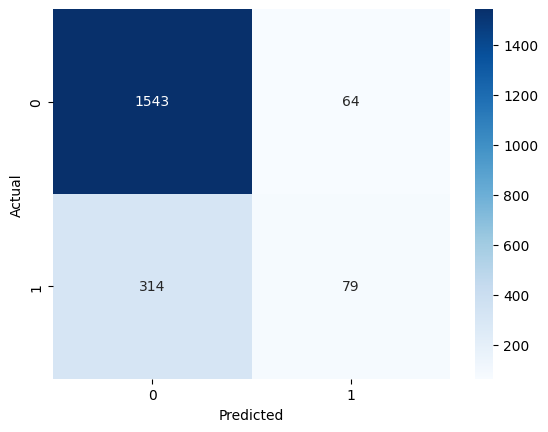

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [63]:
y_prob = model.predict_proba(X_test)[:,1]  # probability of churn
results_df['y_prob'] = y_prob
results_df.head()

,y_test,y_pred,y_prob
RowNumber,,,
6253,0,0,0.232802
4685,0,0,0.077203
1732,0,0,0.315751
4743,0,0,0.434462
4522,0,0,0.067030


In [64]:
from sklearn.metrics import roc_auc_score

print(f'{roc_auc_score(y_test, y_prob):.2f}')



0.78


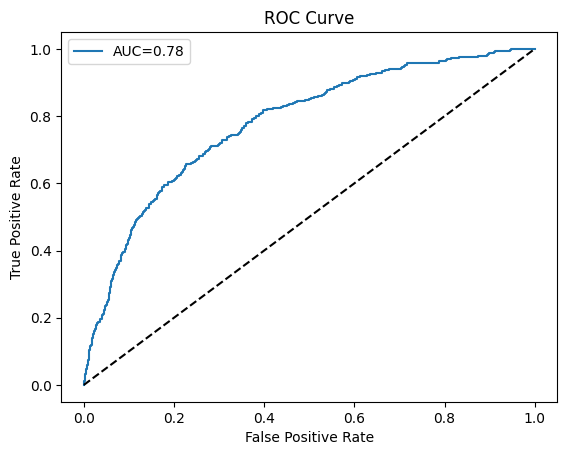

In [65]:
from sklearn.metrics import roc_auc_score, roc_curve

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC={roc_auc_score(y_test, y_prob):.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [66]:
# Choose a lower threshold, e.g., 0.3 instead of 0.5
threshold = 0.3
y_pred_new = (y_prob >= threshold).astype(int)

# Check new confusion matrix and metrics
cm = confusion_matrix(y_test, y_pred_new)
print("Confusion Matrix:\n", cm)
print(classification_report(y_test, y_pred_new))


Confusion Matrix:
 [[1386  221]
 [ 186  207]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1607
           1       0.48      0.53      0.50       393

    accuracy                           0.80      2000
   macro avg       0.68      0.69      0.69      2000
weighted avg       0.80      0.80      0.80      2000



In [67]:
print(f'{roc_auc_score(y_test, y_pred_new):.2f}')

0.69
